In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [0]:
import pickle

In [111]:
cd /content/drive/My Drive/Deep_Learning_Projects/ImageNet/Datasets/

/content/drive/My Drive/Deep_Learning_Projects/ImageNet/Datasets


In [0]:
# !tar xf cifar-10-python.tar.gz -C new

In [0]:
with open('new/cifar-10-batches-py/data_batch_1', 'rb') as input_file:
  x = pickle.load(input_file, encoding='latin1')

In [0]:
x = x['data']

In [115]:
x.shape

(10000, 3072)

In [0]:
x = x.reshape(-1, 3, 32, 32)

In [117]:
x.shape

(10000, 3, 32, 32)

In [0]:
img = x[1, :, :, :]

In [119]:
img.shape

(3, 32, 32)

In [0]:
img = img.transpose(1, 2, 0)

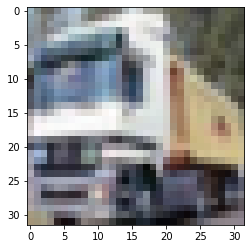

In [121]:
plt.imshow(img)

In [122]:
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

In [0]:
mean = [0.4915, 0.4823, 0.4467]
std = [0.2383, 0.23486, 0.25264]

In [0]:
train_transform = transforms.Compose([
  transforms.Resize(32),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize(mean, std)                                    
]) 

In [0]:
test_transform = transforms.Compose([
  transforms.Resize(32),
  transforms.ToTensor(),
  transforms.Normalize(mean, std)                                     
])

In [126]:
trainset = torchvision.datasets.CIFAR10(root = '/content/drive/My Drive/Colab Notebooks/Udacity_DL/Dataset/CIFAR-10', 
                                        train=True, 
                                        download=True, 
                                        transform= train_transform)

Files already downloaded and verified


In [127]:
testset = torchvision.datasets.CIFAR10(root = '/content/drive/My Drive/Colab Notebooks/Udacity_DL/Dataset/CIFAR-10', 
                                       train=False, 
                                       download=True, 
                                       transform= test_transform)

Files already downloaded and verified


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, 
                            batch_size=16, 
                            shuffle=True, 
                            num_workers=2)

In [0]:
testloader = torch.utils.data.DataLoader(testset, 
                            batch_size=16, 
                            shuffle=False, 
                            num_workers=2)

In [130]:
class_names = trainset.classes

print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [131]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/My Drive/Colab Notebooks/Udacity_DL/Dataset/CIFAR-10
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=32, interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.4915, 0.4823, 0.4467], std=[0.2383, 0.23486, 0.25264])
           )

In [0]:
img, label = iter(trainloader).next()

In [133]:
img.shape

torch.Size([16, 3, 32, 32])

In [134]:
label

tensor([2, 4, 8, 3, 1, 6, 6, 7, 2, 2, 5, 2, 6, 0, 0, 1])

#CNN Model

In [0]:
in_size = 3

hid1_size = 16
hid2_size = 32

out1_size = 400
out2_size = 10

k_conv_size = 5

In [0]:
class ConvNet(nn.Module):

  def __init__(self):
    super(ConvNet, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(hid2_size * k_conv_size * k_conv_size, out1_size),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(out1_size, out2_size)
    )

  def forward(self, x):

    out = self.layer1(x)
    out = self.layer2(out)

    out = out.reshape(out.size(0), -1)

    out = self.layer3(out)

    return F.log_softmax(out, dim=1)

#Training Model

In [0]:
model = ConvNet()

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [139]:
print(device)

cuda:0


In [140]:
model.to(device)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=800, out_features=400, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=400, out_features=10, bias=True)
  )
)

In [0]:
learning_rate = 0.001

criterion = nn.NLLLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [0]:
total_step = len(trainloader)
epochs = 15
loss_values = list()

In [143]:
for epoch in range(epochs):

  for i, (images, labels) in enumerate(trainloader):

    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(i+1) % 2000 == 0:
      print("Epoch [{}/{}], Step[{}/{}], Loss: {:.4f}".format(epoch+1, epochs, i+1, total_step, loss.item()))

      loss_values.append(loss.item())
      
print('Finished Training')


Epoch [1/15], Step[2000/3125], Loss: 1.1680
Epoch [2/15], Step[2000/3125], Loss: 1.1528
Epoch [3/15], Step[2000/3125], Loss: 1.1500
Epoch [4/15], Step[2000/3125], Loss: 1.1696
Epoch [5/15], Step[2000/3125], Loss: 0.9076
Epoch [6/15], Step[2000/3125], Loss: 1.0380
Epoch [7/15], Step[2000/3125], Loss: 0.6847
Epoch [8/15], Step[2000/3125], Loss: 0.7458
Epoch [9/15], Step[2000/3125], Loss: 0.9539
Epoch [10/15], Step[2000/3125], Loss: 1.7337
Epoch [11/15], Step[2000/3125], Loss: 0.7367
Epoch [12/15], Step[2000/3125], Loss: 0.4419
Epoch [13/15], Step[2000/3125], Loss: 0.5007
Epoch [14/15], Step[2000/3125], Loss: 0.8305
Epoch [15/15], Step[2000/3125], Loss: 0.4781
Finished Training


Text(0, 0.5, 'Loss')

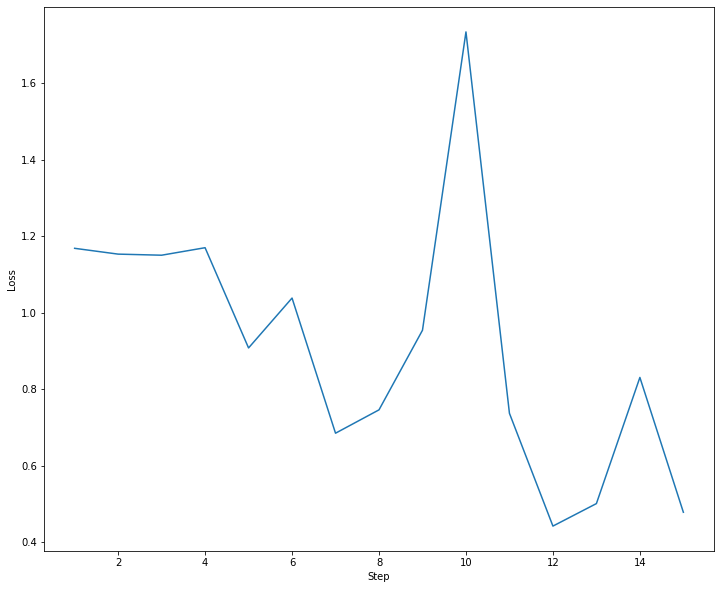

In [153]:
x = (range(1, 16))

plt.figure(figsize = (12, 10))

plt.plot(x, loss_values)
plt.xlabel('Step')
plt.ylabel('Loss')

In [155]:
model.eval()
with torch.no_grad():
  correct = 0
  total = 0

  for images, labels in testloader:

    images, labels = images.to(device), labels.to(device)
    outputs = model(images)

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print("Accuracy of the model on the 1000 test images: {}%".format(100*correct/total))


Accuracy of the model on the 1000 test images: 74.86%


In [0]:
sample_img, _ = testset[23]

In [157]:
sample_img.shape

torch.Size([3, 32, 32])

In [0]:
sample_img = np.transpose(sample_img, (1, 2, 0))

In [0]:
m, M = sample_img.min(), sample_img.max()

sample_img = ((1/abs(m)*M)) * sample_img + 0.5

#To rescale img between 0 to 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


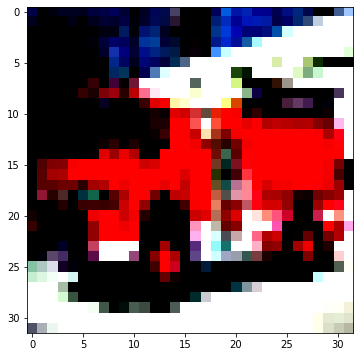

In [160]:
plt.figure(figsize = (6, 6))
plt.imshow(sample_img)

In [0]:
test_img, test_label = testset[23]

In [0]:
test_img = test_img.reshape(-1, 3, 32, 32)

In [0]:
out_predict = model(test_img.to(device))
_, predicted = torch.max(out_predict.data, 1) 

In [164]:
print("Actual Label : ", test_label)

Actual Label :  9


In [165]:
print("Predcited Label : ", predicted.item())

Predcited Label :  9


In [166]:
print("CLas name for {} : {} ".format(predicted.item(), class_names[predicted.item()]))

CLas name for 9 : truck 
